In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
df= pd.read_csv('heart.csv')

In [35]:
# generate two class dataset
X=df.drop('target', axis=1)
y=df['target']

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)


In [36]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

/home/mantis/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [38]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

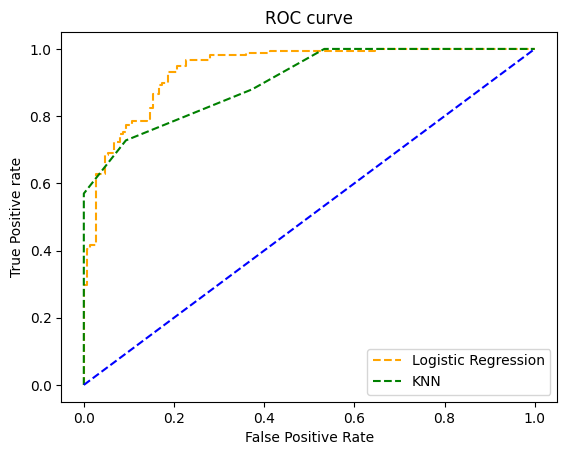

In [39]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [40]:
j_scores = tpr1 - fpr1
best_index = np.argmax(j_scores)
best_threshold = thresh1[best_index]

print("Best threshold (Youden's J):", best_threshold)

Best threshold (Youden's J): 0.5112574669906206


In [41]:
y_pred=model1.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))

[[121  29]
 [ 11 147]]


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       150
           1       0.84      0.93      0.88       158

    accuracy                           0.87       308
   macro avg       0.88      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



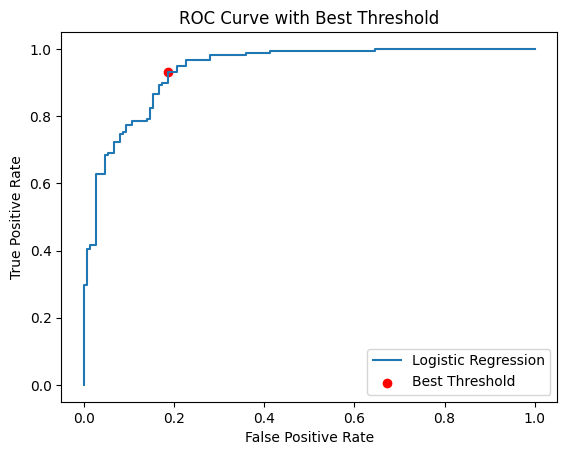

In [44]:
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.scatter(fpr1[best_index], tpr1[best_index], color='red', label='Best Threshold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Best Threshold")
plt.legend()
plt.show()

In [45]:
y_pred_optimal = (pred_prob1[:,1] >= best_threshold).astype(int)

In [46]:
print(confusion_matrix(y_test, y_pred_optimal))


[[122  28]
 [ 11 147]]


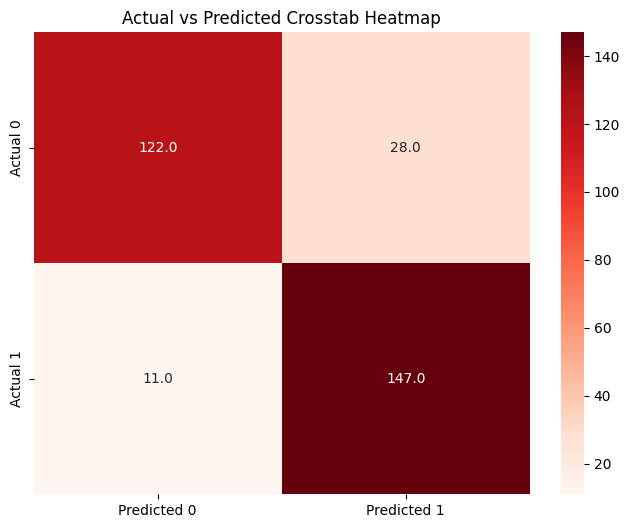

In [47]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_optimal)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'],
                         columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='.1f')
plt.title('Actual vs Predicted Crosstab Heatmap')
plt.show()

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       150
           1       0.84      0.93      0.88       158

    accuracy                           0.87       308
   macro avg       0.88      0.87      0.87       308
weighted avg       0.88      0.87      0.87       308

